Step 1: Import Libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Load Dataset

In [20]:
df = pd.read_csv("breast-cancer.csv")

# Explore
print(df.head())
print(df.info())
print(df.isnull().sum())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

Step 3: Preprocessing

In [21]:
# Drop ID column
df.drop('id', axis=1, inplace=True)

# Encode diagnosis column
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])  # M=1, B=0

# Split features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 4: Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Step 5: Train SVM with Linear Kernel

In [23]:
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("\nLinear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.956140350877193


Step 6: Train SVM with RBF Kernel

In [24]:
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:", accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9736842105263158


Step 7: Hyperparameter Tuning (RBF Kernel)

In [25]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto']
}
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("\nBest Parameters (RBF):", grid_search.best_params_)


Best Parameters (RBF): {'C': 1, 'gamma': 'scale'}


Step 8: Cross-Validation

In [26]:
cv_scores_linear = cross_val_score(SVC(kernel='linear'), X_scaled, y, cv=5)
cv_scores_rbf = cross_val_score(SVC(kernel='rbf', **grid_search.best_params_), X_scaled, y, cv=5)

print("\nCross-Validation Accuracy (Linear):", cv_scores_linear.mean())
print("Cross-Validation Accuracy (RBF):", cv_scores_rbf.mean())


Cross-Validation Accuracy (Linear): 0.9701443875174661
Cross-Validation Accuracy (RBF): 0.9736376339077782


Step 9: Visualization - Decision Boundary (using first 2 features)

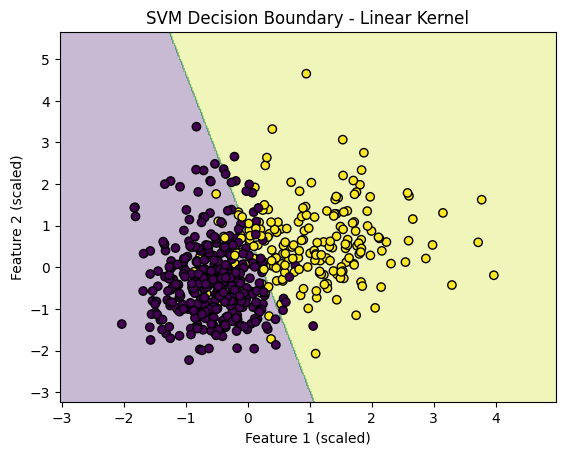

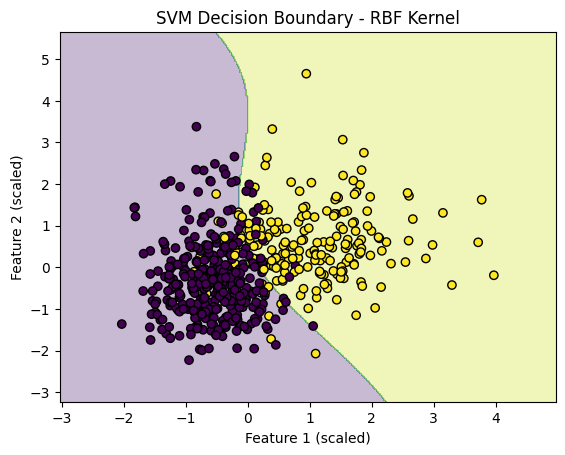

In [27]:
def plot_decision_boundary(X, y, model, title):
    X = X[:, :2]  # only first 2 features for plotting
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1 (scaled)')
    plt.ylabel('Feature 2 (scaled)')
    plt.title(title)
    plt.show()

plot_decision_boundary(X_scaled, y, SVC(kernel='linear', C=1), "SVM Decision Boundary - Linear Kernel")
plot_decision_boundary(X_scaled, y, SVC(kernel='rbf', C=1, gamma=0.1), "SVM Decision Boundary - RBF Kernel")

Step 10: Classification Reports

In [28]:
print("\nLinear Kernel Classification Report:")
print(classification_report(y_test, y_pred_linear))

print("RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))


Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

